In [39]:
import numpy as np
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML
import imageio
import os
import glob
import matplotlib.pyplot as plt
import json
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation, rc, cm
import seaborn as sns

In [40]:
#set directories
direc = '/Users/catherinekim/Desktop/VRTL/behavioral_folder'
participant_order = ["G,W,C","G,C,W",
                     "W,G,C","W,G,C",
                     "C,G,W","C,G,W",
                     "C,W,G","C,W,G",
                     "G,W,C","G,C,W",
                     "G,W,C"] #append every participant condition order to this list
# direc = '/Users/catherinekim/Desktop/VRTL/VRTL04/behavioral_data'


In [ ]:
#Accuracy - attention check

for sub in range(1,12): # number of participants
    lure_list =[]
    wrong_list = []
    print ("Participant #:",sub)
    
    if participant_order[sub-1]== "G,W,C":
            [A,B,C] = [1.00,2.00,3.00]
            [first,second,third]= ["Green","White","Wall"]
    elif participant_order[sub-1] == "G,C,W":
            [A,B,C] = [1.00,3.00,2.00]
            [first,second,third]= ["Green","Wall","White"]
    elif participant_order[sub-1] == "W,G,C":
            [A,B,C] = [2.00,1.00,3.00]
            [first,second,third]= ["White","Green","Wall"]
    elif participant_order[sub-1] == "W,C,G":
            [A,B,C] = [2.00,3.00,1.00]
            [first,second,third]= ["White","Wall","Green"]
    elif participant_order[sub-1] == "C,G,W":
            [A,B,C] = [3.00,1.00,2.00]
            [first,second,third]= ["Wall","Green","White"]
    elif participant_order[sub-1] == "C,W,G":
            [A,B,C] = [3.00,2.00,1.00]
            [first,second,third]= ["Wall","White","Green"]
    
    for n in range(1,12): # 3 attention tasks
        pattern = f"{direc}/VRTL{sub}S{n}_AttentionTask*.csv"
        matching_files = glob.glob(pattern)
        for filename in matching_files:
            attention_df = pd.read_csv(filename)
            attention_check = attention_df[['currentImagePath','keyObject.keys']].iloc[1:21]
            lure_paths = attention_check[attention_check['currentImagePath'].str.startswith('Lure/')]
            other_paths = attention_check[~attention_check['currentImagePath'].str.startswith('Lure/')]
            
        for index, row in lure_paths.iterrows():
            # if row['keyObject.keys'] == 'n':
            #     print('good')
            if row['keyObject.keys'] =='y':
                # print("ERROR"+row['currentImagePath'])
                lure_list.append(row['currentImagePath'])

        for index, row in other_paths.iterrows():
            # if row['keyObject.keys'] =='y':
            #     print('good')
            if row['keyObject.keys'] =='n':
                # print("ERROR:"+row['currentImagePath'])
                wrong_list.append(row['currentImagePath'])
        
    print(wrong_list)
    print("ERROR-Lure #:", len(lure_list))
    print("ERROR-A #:", len([item for item in wrong_list if item.startswith(first)]))  
    print("ERROR-B #:", len([item for item in wrong_list if item.startswith(second)]))   
    print("ERROR-C #:", len([item for item in wrong_list if item.startswith(third)]))

    print(" ")

    


In [ ]:
for sub in range(1, 12):  # Number of participants
    lure_list = []
    wrong_list = []
    print("Participant #:", sub)
    
    # Define the order of the participants
    if participant_order[sub - 1] == "G,W,C":
        [A, B, C] = [1.00, 2.00, 3.00]
        [first, second, third] = ["Green", "White", "Wall"]
    elif participant_order[sub - 1] == "G,C,W":
        [A, B, C] = [1.00, 3.00, 2.00]
        [first, second, third] = ["Green", "Wall", "White"]
    elif participant_order[sub - 1] == "W,G,C":
        [A, B, C] = [2.00, 1.00, 3.00]
        [first, second, third] = ["White", "Green", "Wall"]
    elif participant_order[sub - 1] == "W,C,G":
        [A, B, C] = [2.00, 3.00, 1.00]
        [first, second, third] = ["White", "Wall", "Green"]
    elif participant_order[sub - 1] == "C,G,W":
        [A, B, C] = [3.00, 1.00, 2.00]
        [first, second, third] = ["Wall", "Green", "White"]
    elif participant_order[sub - 1] == "C,W,G":
        [A, B, C] = [3.00, 2.00, 1.00]
        [first, second, third] = ["Wall", "White", "Green"]

    for n in range(1, 12):  # 3 attention tasks
        pattern = f"{direc}/VRTL{sub}S{n}_AttentionTask*.csv"
        matching_files = glob.glob(pattern)
        for filename in matching_files:
            attention_df = pd.read_csv(filename)
            attention_check = attention_df[['currentImagePath', 'keyObject.keys']].iloc[1:21]
            lure_paths = attention_check[attention_check['currentImagePath'].str.startswith('Lure/')]
            other_paths = attention_check[~attention_check['currentImagePath'].str.startswith('Lure/')]
            
            for index, row in lure_paths.iterrows():
                if row['keyObject.keys'] == 'y':
                    lure_list.append(row['currentImagePath'])

            for index, row in other_paths.iterrows():
                if row['keyObject.keys'] == 'n':
                    wrong_list.append(row['currentImagePath'])
        
    print(wrong_list)
    print("ERROR-Lure #:", len(lure_list))
    print("ERROR-A #:", len([item for item in wrong_list if item.startswith(first)]))  
    print("ERROR-B #:", len([item for item in wrong_list if item.startswith(second)]))   
    print("ERROR-C #:", len([item for item in wrong_list if item.startswith(third)]))

    print(" ")

In [ ]:
#bar plot

participant = ("sub1","sub2","sub3","sub4","sub5")
data = {'A': (4,1,0,0,0), 'B': (1,2,1,0,1), 'C': (1,2,1,1,0)}

x = np.arange(len(participant))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout ='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('number of errors')
ax.set_title('Attention-check')
ax.set_xticks(x + width, participant)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 10)

plt.show()

In [ ]:
#Reaction time-attention check

for sub in range(1,12): #get the keys
    lure_list =[]
    wrong_list = []
    print ("Participant #:",sub)
    if participant_order[sub-1]== "G,W,C":
            [A,B,C] = [1.00,2.00,3.00]
            [first,second,third]= ["Green","White","Wall"]
    elif participant_order[sub-1] == "G,C,W":
            [A,B,C] = [1.00,3.00,2.00]
            [first,second,third]= ["Green","Wall","White"]
    elif participant_order[sub-1] == "W,G,C":
            [A,B,C] = [2.00,1.00,3.00]
            [first,second,third]= ["White","Green","Wall"]
    elif participant_order[sub-1] == "W,C,G":
            [A,B,C] = [2.00,3.00,1.00]
            [first,second,third]= ["White","Wall","Green"]
    elif participant_order[sub-1] == "C,G,W":
            [A,B,C] = [3.00,1.00,2.00]
            [first,second,third]= ["Wall","Green","White"]
    elif participant_order[sub-1] == "C,W,G":
            [A,B,C] = [3.00,2.00,1.00]
            [first,second,third]= ["Wall","White","Green"]
    for n in range(1,4):
        pattern = f"{direc}/VRTL{sub}S{n}_AttentionTask*.csv"
        matching_files = glob.glob(pattern)
        for filename in matching_files:
            attention_df = pd.read_csv(filename)
            #print(attention_df['currentImagePath'][1:2])
            attention_check = attention_df[['currentImagePath','keyObject.rt']].iloc[1:21]
            lure_paths = attention_check[attention_check['currentImagePath'].str.startswith('Lure/')]
            other_paths = attention_check[~attention_check['currentImagePath'].str.startswith('Lure/')]
        
        
        print("Average rt of session",n,":",np.average(other_paths['keyObject.rt']))
        print("Average rt of lure:",np.average(lure_paths['keyObject.rt']))
        print(" ")

In [ ]:
#bar plot

participant = ("sub6","sub7","sub8","sub9","sub10","sub11")
data = {'A': (2.24,2.01,2.09,1.90,1.31,1.80), 'B': (2.22,1.29,1.43,1.20,1.16,1.45), 'C': (1.38,2.57,1.65,1.57,0.95,1.59), 'Lure': (1.12,1.39,1.86,1.78,0.91,1.41)}

x = np.arange(len(participant))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

#fig, ax = plt.subplots(layout ='constrained')
fig, ax = plt.subplots(figsize=(20,10))
for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('reaction time (seconds)')
ax.set_title('Attention-check')
ax.set_xticks(x + width, participant)
ax.legend(loc='upper right', ncols=4)
ax.set_ylim(0, 5)

plt.show()

In [ ]:
#post-VR mood
# slider: Valence + slider_2: Arousal
for sub in range(1,12):
    print(" ")
    print ("Participant #:",sub)
    for n in range(1,8):
        pattern = f"{direc}/VRTL{sub}S{n}_post_MoodMeasure*.csv"
        matching_files = glob.glob(pattern)
        for filename in matching_files:
            mood_df = pd.read_csv(filename)
            #print(filename)
            print("session:",n,"  ","condition:",mood_df['condition'][1])
            valence_score = mood_df[['slider.response']].dropna()
            arousal_score = mood_df[['slider_2.response']].dropna()
            #valence_rt = mood_df[['slider.rt']].dropna()
            #valence_rt = mood_df[['slider_2.rt']].dropna()
            # valence_score = mood_df[['slider.response','slider.rt']].dropna()
            # arousal_score = mood_df[['slider_2.response','slider_2.rt']].dropna()
            print("valence score:", valence_score)
            print("arousal score:",arousal_score)


In [ ]:
#valence- bar plot

# participant = ("sub1","sub2")
# data = {'A': (5.03,5.14), 'B': (4.98,4.92), 'C': (4.58,4.36), 'C-fear': (4.48,4.25), 'A-test': (4.25,5.58), 'B-test':(4.37,4.94)}

# participant = ("valence","arousal") #participant 5
# data = {'A': (6.27,2.94), 'B': (6.98,3.10), 'C': (4.57,4.86), 'C-fear': (5.06,5.73), 'A-test': (5.00,2.32), 'B-test':(4.95,2.84)}
participant = ("s")
#data = {'A': (6.27,3.51), 'B': (6.98,5.92), 'C': (4.57,6.0), 'C-fear': (5.06,2.03), 'A-test': (5.00,3.79), 'B-test':(4.95,4.33)}
#data = {'A': (5.46,4.71), 'B': (3.76,6.04), 'C': (5.32,3.38), 'C-fear': (4.18,2.54), 'A-test': (5.24,0), 'B-test':(3.68,4.29)}
#data = {'A': (5.53,3.67), 'B': (6.24,4.01), 'C': (4.47,4.68), 'C-fear': (1.05,3.91), 'A-test': (5.42,3.82), 'B-test':(6.13,3.84)}
data = {'A': (4.39), 'B': (3.75), 'C': (3.12), 'C-fear': (2.52), 'A-test': (3.82), 'B-test':(4.18)}


x = np.arange(len(participant))  # the label locations
width = 0.12  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout ='constrained')
#fig, ax = plt.subplots(figsize=(20,10))
for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('score')
ax.set_title('valence')
ax.set_xticks(x + width, participant)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 7)

plt.show()

In [ ]:
#arousal- bar plot

# participant = ("sub1","sub2")
# data = {'A': (5.92), 'B': (3.73,3.65), 'C': (3.67,3.40), 'C-fear': (4.75,4.12), 'A-test': (3.14,3.38), 'B-test':(3.12,4.32)}

participant = ("s")
#data = {'A': (2.94,3.71), 'B': (3.10,3.20), 'C': (4.86,4.69), 'C-fear': (5.75,6.12), 'A-test': (2.32,3.79), 'B-test':(2.84,4.33)}
#data = {'A': (2.52,2.58), 'B': (4.65,3.36), 'C': (4.45,5.49), 'C-fear': (5.11,5.92), 'A-test': (3.74,0), 'B-test':(3.63,2.47)}
#data = {'A': (3.09,2.68), 'B': (1.67,3.13), 'C': (4.38,4.05), 'C-fear': (5.86,4.47), 'A-test': (3.47,3.65), 'B-test':(4.48,3.78)}
data = {'A': (1.24), 'B': (4.12), 'C': (4.25), 'C-fear': (5.08), 'A-test': (2.72), 'B-test':(2.63)}


x = np.arange(len(participant))  # the label locations
width = 0.12  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout ='constrained')
#fig, ax = plt.subplots(figsize=(20,10))
for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('score')
ax.set_title('Arousal scale')
ax.set_xticks(x + width, participant)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 7)

plt.show()

In [ ]:
#memory task- accuracy
#G=1.00, W=2.00, C= 3.00

for sub in range(1,12): #get the keys
      print(" ")
      print ("Participant #:",sub)
      if participant_order[sub-1]== "G,W,C":
            [first,second,third] = [1.00,2.00,3.00]
      elif participant_order[sub-1] == "G,C,W":
            [first,second,third] = [1.00,3.00,2.00]
      elif participant_order[sub-1] == "W,G,C":
            [first,second,third] = [2.00,1.00,3.00]
      elif participant_order[sub-1] == "W,C,G":
            [first,second,third] = [2.00,3.00,1.00]
      elif participant_order[sub-1] == "C,G,W": #weird participant 5
            [first,second,third] = [2.00,3.00,1.00]
      elif participant_order[sub-1] == "C,W,G":
            [first,second,third] = [3.00,2.00,1.00]
      
      pattern = f"{direc}/VRTL{sub}S5_MemoryTask*.csv"
      matching_files = glob.glob(pattern)
      for filename in matching_files:
            memory_df = pd.read_csv(filename)
            memory_check = memory_df[['currentImagePath','keyObject.keys','keyObject.rt']].iloc[3:43]
            category_map = {1.0: 'A', 2.0: 'B', 3.0: 'C', 4.0: 'Lure'}
            
            for category, paths, expected_key in [("Lure", memory_check[memory_check['currentImagePath'].str.startswith('Lure/')], 4.0),
                                              ("Green", memory_check[memory_check['currentImagePath'].str.startswith('Green/')], first),
                                              ("White", memory_check[memory_check['currentImagePath'].str.startswith('White/')], second),
                                              ("Wall", memory_check[memory_check['currentImagePath'].str.startswith('Wall/')], third)]:
                  for index, row in paths.iterrows():
                        miscategory = category_map.get(row['keyObject.keys'], 'Unknown')
                        if row['keyObject.keys'] != expected_key:
                              print(f"ERROR: {row['currentImagePath']}   Miscategorized: {miscategory}   rt: {row['keyObject.rt']}")


In [ ]:
#memory task- reaction time

for sub in range(1,6): #get the keys
      print ("Participant #:",sub)
      if participant_order[sub-1]== "G,W,C":
            [first,second,third] = [1.00,2.00,3.00]
      elif participant_order[sub-1] == "G,C,W":
            [first,second,third] = [1.00,3.00,2.00]
      elif participant_order[sub-1] == "W,G,C":
            [first,second,third] = [2.00,1.00,3.00]
      elif participant_order[sub-1] == "W,C,G":
            [first,second,third] = [2.00,3.00,1.00]
      elif participant_order[sub-1] == "C,G,W":
            [first,second,third] = [3.00,1.00,2.00]
      elif participant_order[sub-1] == "C,W,G":
            [first,second,third] = [3.00,2.00,1.00]
      pattern = f"{direc}/VRTL0{sub}S5_MemoryTask*.csv"
      matching_files = glob.glob(pattern)
      for filename in matching_files:
            memory_df = pd.read_csv(filename)
            memory_check = memory_df[['currentImagePath','keyObject.keys','keyObject.rt']].iloc[3:43]
            lure_paths = memory_check[memory_check['currentImagePath'].str.startswith('Lure/')]
            green_paths = memory_check[memory_check['currentImagePath'].str.startswith('Green/')]
            white_paths = memory_check[memory_check['currentImagePath'].str.startswith('White/')]
            cabin_paths = memory_check[memory_check['currentImagePath'].str.startswith('Wall/')]

            lure_avg= np.average(lure_paths['keyObject.rt'])
            lure_std= np.std(lure_paths['keyObject.rt'])
            print("lure avg:",lure_avg,"  lure std:",lure_std)
            green_avg = np.average(green_paths['keyObject.rt'])
            green_std= np.std(green_paths['keyObject.rt'])
            print("green avg:",green_avg,"  green std:",green_std)
            white_avg= np.average(white_paths['keyObject.rt'])
            white_std= np.std(white_paths['keyObject.rt'])
            print("white avg:",white_avg,"  white std:",white_std)
            cabin_avg= np.average(cabin_paths['keyObject.rt'])
            cabin_std= np.std(cabin_paths['keyObject.rt'])
            print("cabin avg:",cabin_avg,"  cabin std:",cabin_std)


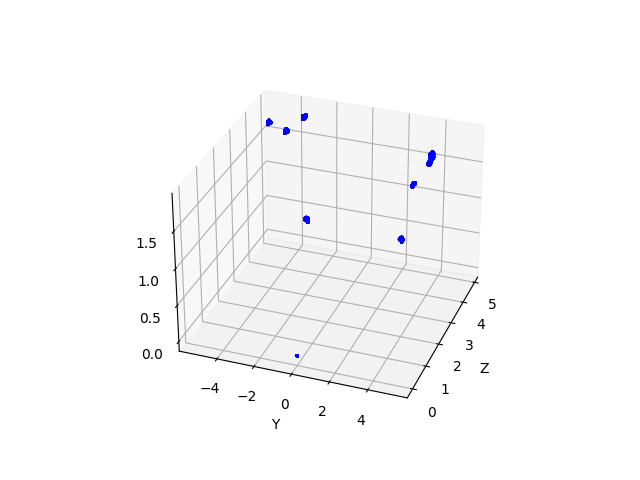

In [100]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 20, vertical_axis='y')
ax.invert_zaxis()

# Origin
# ax.scatter3D(0, 0, 0, color="r", s=50)
# ax.quiver(-4, 0, 0, 36, 0, 0, color='#aaaaaa',linestyle='dashed')
# ax.quiver(0, -4, 0, 0, 36, 0, color='#aaaaaa',linestyle='dashed')
# ax.quiver(0, 0, -1, 0, 0, 4, color='#aaaaaa',linestyle='dashed')

# Camera
# ax.quiver(camera_location[0], camera_location[1], camera_location[2], v2[0], v2[1], v2[2], color='b')
# ax.scatter3D(camera_location[0], camera_location[1], camera_location[2], color='b', s=50)

# Data
ax.scatter(origin_x[1482:48882], origin_y[1482:48882],origin_z[1482:48882], color="b", s=2) #1   #1=4
#ax.scatter3D(origin_x[1482:1500], origin_y[1482:1500], origin_z[1482:1500], color="r",s=2) #2   2=3
#ax.scatter3D(x[22000:28000], y[22000:28000], z[22000:28000], color="k",s=2) #3
# ax.scatter3D(origin_x[250:300], origin_y[250:300], origin_z[250:300], color="g",s=2) #4
# ax.scatter3D(origin_x[310:350], origin_y[310:350], origin_z[310:350], color="k",s=2) #1=4=5

# ax.scatter3D(origin_x[130:150], origin_y[130:150], origin_z[130:150], color="k",s=2)
# ax.scatter3D(origin_x[300:360], origin_y[300:360], origin_z[300:360], color="g",s=2)
# ax.scatter3D(origin[61:120], y_R[61:120], z_R[61:120], color="r",s=2)
#ax.set_xlim([-1, 1])
#ax.set_ylim([-1, 10])
#ax.set_zlim([-1, 10])

ax.set_xlabel('X')
ax.set_xlabel('Y')
ax.set_zlabel('Z');
